# EDA for GemStone_Price_Prediction

### Introduction about the data:

There are 10 independent variables(including id):

* ID: Unique identifier of each diamond.
* CARAT: Carat refers to the unique unit of weight measurement used to weigh gemstones and diamonds.
* CUT: Quality of Diamond Cut.
* COLOR: Color of Diamond.
* CLARITY: Diamond clarity is a measure of the purity and rarity of the stone, graded by the visibility of these characteristics under 10-power magnification.
* DEPTH: The depth of the diamond is its height (in millimeters) measured from the culet (bottom tip) to the table (flat, top surface)
table: A diamond's table is the facet that can be seen when the stone is viewed face up.
* x : Diamond X dimension
* y: Diamond Y dimension
* x : Diamond Z dimension

### Target variable:
Price: Price of the given Diamond.


Dataset Link: https://www.kaggle.com/competitions/playground-series-s3e8/data?select=train.csv

Import Data and Required Packages

Importing pandas, numpy, mathplotlib, seaborn and warnings library.

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv("gemstone.csv")
df.head()

,id,carat,cut,color,clarity,depth,table,x,y,z,price
0,0,1.52,Premium,F,VS2,62.2,58.0,7.27,7.33,4.55,13619
1,1,2.03,Very Good,J,SI2,62.0,58.0,8.06,8.12,5.05,13387
2,2,0.70,Ideal,G,VS1,61.2,57.0,5.69,5.73,3.50,2772
3,3,0.32,Ideal,G,VS1,61.6,56.0,4.38,4.41,2.71,666
4,4,1.70,Premium,G,VS2,62.6,59.0,7.65,7.61,4.77,14453


Dataset Info

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193573 entries, 0 to 193572
Data columns (total 11 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       193573 non-null  int64  
 1   carat    193573 non-null  float64
 2   cut      193573 non-null  object 
 3   color    193573 non-null  object 
 4   clarity  193573 non-null  object 
 5   depth    193573 non-null  float64
 6   table    193573 non-null  float64
 7   x        193573 non-null  float64
 8   y        193573 non-null  float64
 9   z        193573 non-null  float64
 10  price    193573 non-null  int64  
dtypes: float64(6), int64(2), object(3)
memory usage: 16.2+ MB


Drop id column as it is statistically insignificant

In [5]:
df = df.drop(labels=['id'],axis=1)

Check Missing Values in Dataset

In [6]:
df.isna().sum()

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
x          0
y          0
z          0
price      0
dtype: int64

No Missing Values found in the dataset

Check Duplicates in Dataset

In [7]:
df.duplicated().sum()

0

No Duplicated data found

Numerical and Categorical columns seperation

In [8]:
numerical_columns = list(df.columns[df.dtypes!='object'])
categorical_columns = list(df.columns[df.dtypes=='object'])
print(f'Numerical Columns   : {numerical_columns}')
print(f'Categorical Columns : {categorical_columns}')

Numerical Columns   : ['carat', 'depth', 'table', 'x', 'y', 'z', 'price']
Categorical Columns : ['cut', 'color', 'clarity']


Numerical Columns Description

In [9]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
carat,193573.0,0.790688,0.462688,0.2,0.40,0.70,1.03,3.50
depth,193573.0,61.820574,1.081704,52.1,61.30,61.90,62.40,71.60
table,193573.0,57.227675,1.918844,49.0,56.00,57.00,58.00,79.00
x,193573.0,5.715312,1.109422,0.0,4.70,5.70,6.51,9.65
y,193573.0,5.720094,1.102333,0.0,4.71,5.72,6.51,10.01
z,193573.0,3.534246,0.688922,0.0,2.90,3.53,4.03,31.30
price,193573.0,3969.155414,4034.374138,326.0,951.00,2401.00,5408.00,18818.00


Categorical Columns Description

In [10]:
df[categorical_columns].describe().T

,count,unique,top,freq
cut,193573,5,Ideal,92454
color,193573,7,G,44391
clarity,193573,8,SI1,53272


All unique values in dataset

In [11]:
df.nunique()

carat       248
cut           5
color         7
clarity       8
depth       153
table       108
x           522
y           521
z           349
price      8738
dtype: int64

Note that cut , color and clarity are ordinal features in dataset.

Univariate Analysis of Numerical Variables

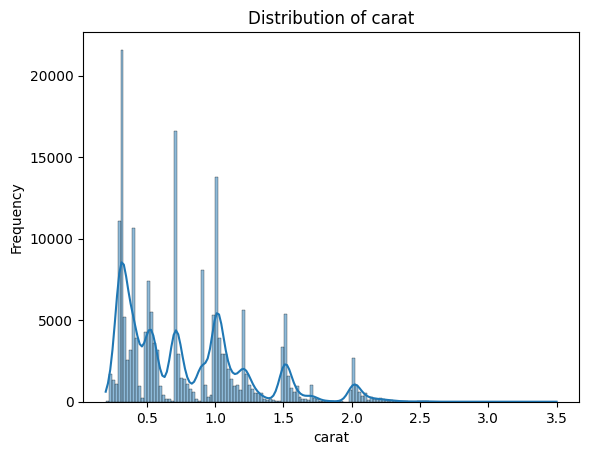

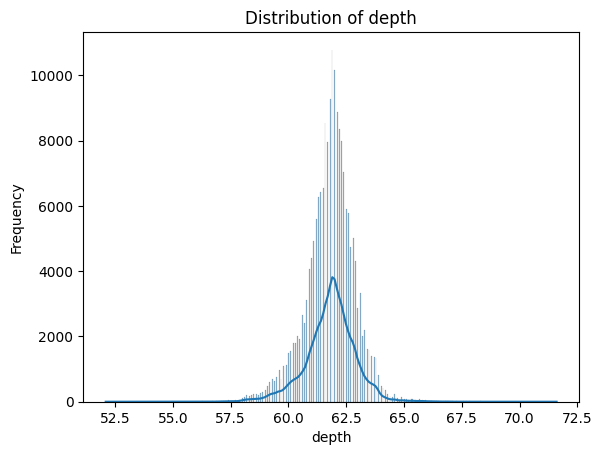

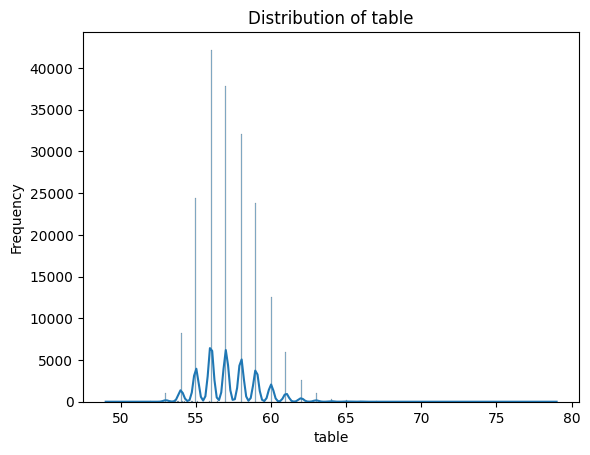

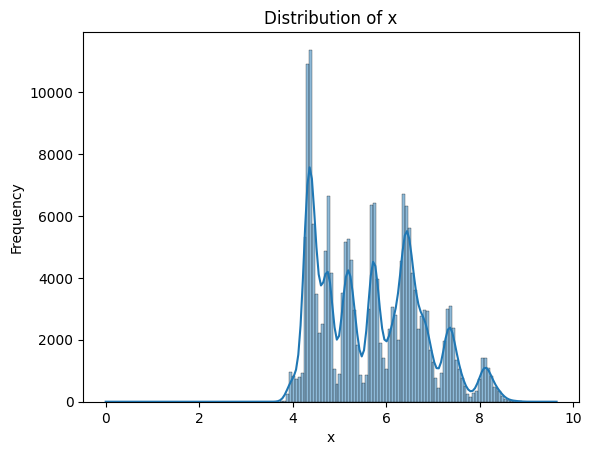

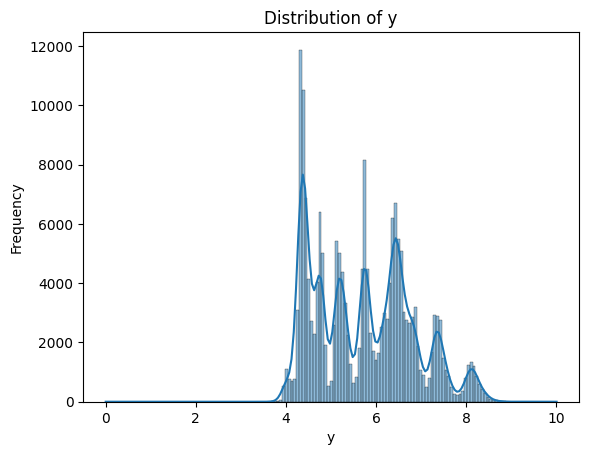

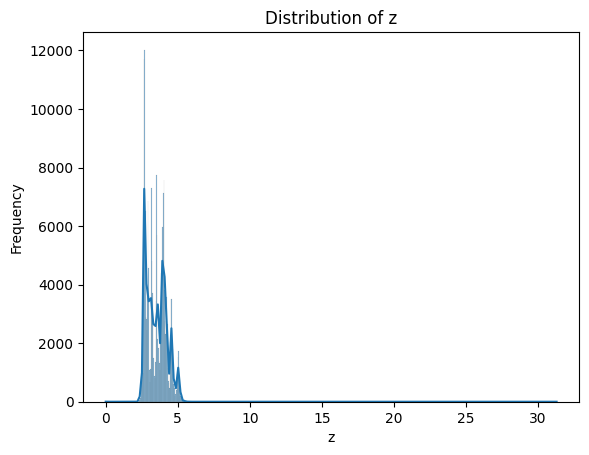

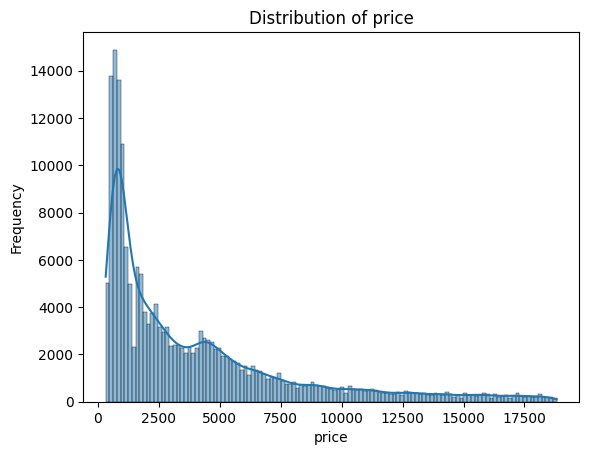

In [12]:
# Define numerical variables
numerical_vars = ['carat','depth','table','x','y','z','price']

# Plot histograms
for var in numerical_vars:
    sns.histplot(df[var], kde=True)
    plt.title(f'Distribution of {var}')
    plt.xlabel(var)
    plt.ylabel('Frequency')
    plt.show()

Observations:

* The code generates histograms for each numerical variable, visualizing their distributions.
* Each histogram provides insights into the shape and spread of the respective variable's distribution.
* We observe different patterns in each variable's distribution, such as skewness, multimodality, or uniformity.

Summary Statistics

In [13]:
# Summary statistics
summary_stats = df[numerical_vars].describe()
print(summary_stats)

               carat          depth          table              x  \
count  193573.000000  193573.000000  193573.000000  193573.000000   
mean        0.790688      61.820574      57.227675       5.715312   
std         0.462688       1.081704       1.918844       1.109422   
min         0.200000      52.100000      49.000000       0.000000   
25%         0.400000      61.300000      56.000000       4.700000   
50%         0.700000      61.900000      57.000000       5.700000   
75%         1.030000      62.400000      58.000000       6.510000   
max         3.500000      71.600000      79.000000       9.650000   

                   y              z          price  
count  193573.000000  193573.000000  193573.000000  
mean        5.720094       3.534246    3969.155414  
std         1.102333       0.688922    4034.374138  
min         0.000000       0.000000     326.000000  
25%         4.710000       2.900000     951.000000  
50%         5.720000       3.530000    2401.000000  
75%    

Observations:

* The code computes summary statistics (e.g., mean, standard deviation, min, max) for each numerical variable.
* Summary statistics provide a concise summary of the central tendency and dispersion of the data.
* We can observe the range of values, the spread of the data, and any potential outliers from these statistics.

Boxplot

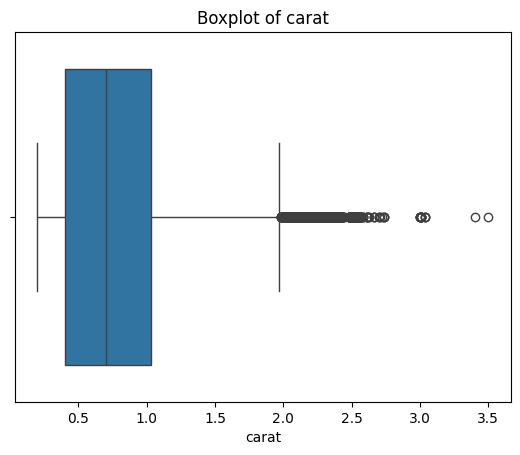

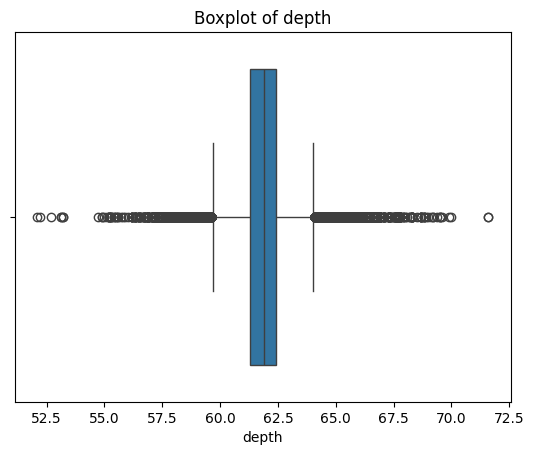

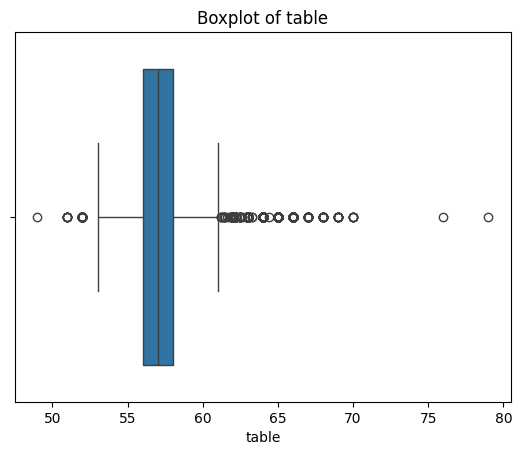

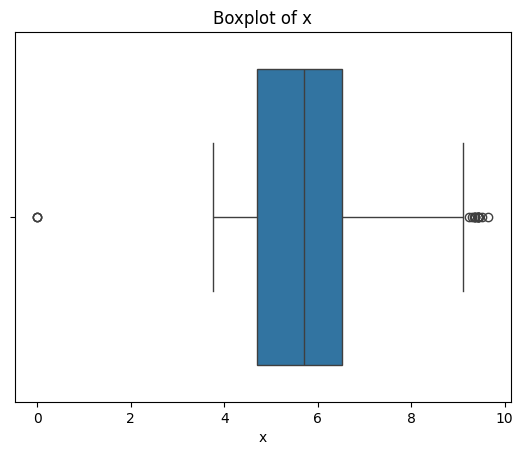

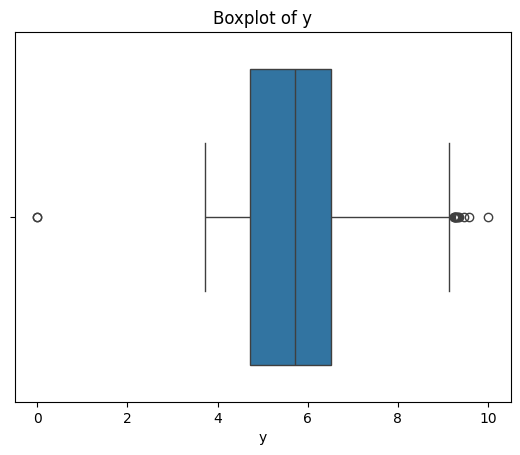

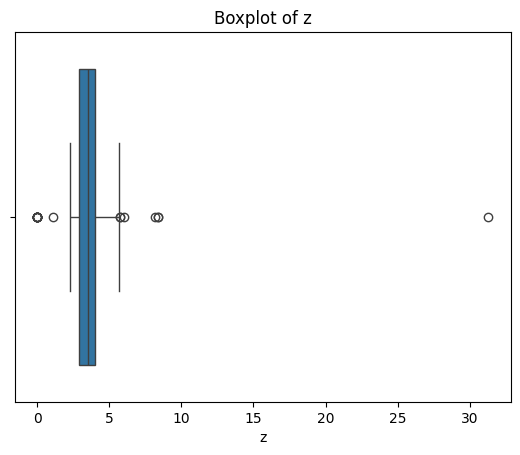

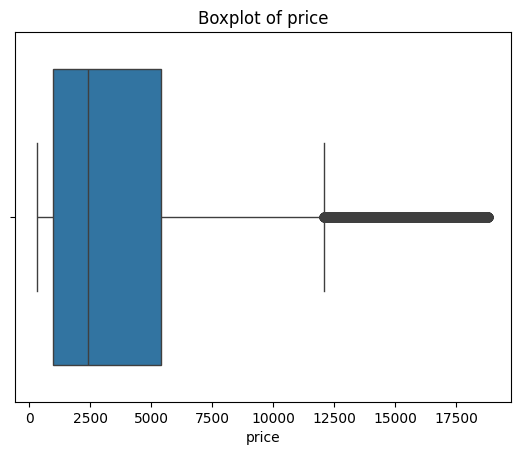

In [14]:
# Boxplot for each numerical variable
for var in numerical_vars:
    sns.boxplot(x=df[var])
    plt.title(f'Boxplot of {var}')
    plt.xlabel(var)
    plt.show()

Observations:

* The code generates boxplots for each numerical variable, providing a visual summary of their distribution and identifying outliers.
* Boxplots display the median, quartiles, and any potential outliers in the data.
* Outliers are points beyond the whiskers of the boxplot, indicating extreme values in the dataset.

Outlier Detection

In [15]:
# Outlier detection using IQR method
Q1 = df[numerical_vars].quantile(0.25)
Q3 = df[numerical_vars].quantile(0.75)
IQR = Q3 - Q1
outliers = ((df[numerical_vars] < (Q1 - 1.5 * IQR)) | (df[numerical_vars] > (Q3 + 1.5 * IQR))).any(axis=1)
outlier_count = outliers.sum()
print("Number of outliers:", outlier_count)

Number of outliers: 24818


## bivariate analysis 

Scatter Plot

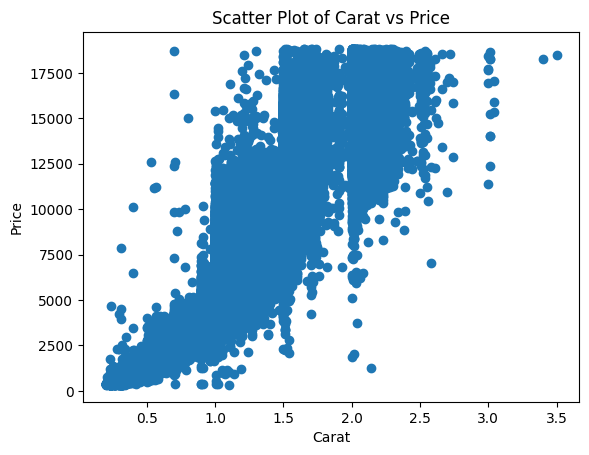

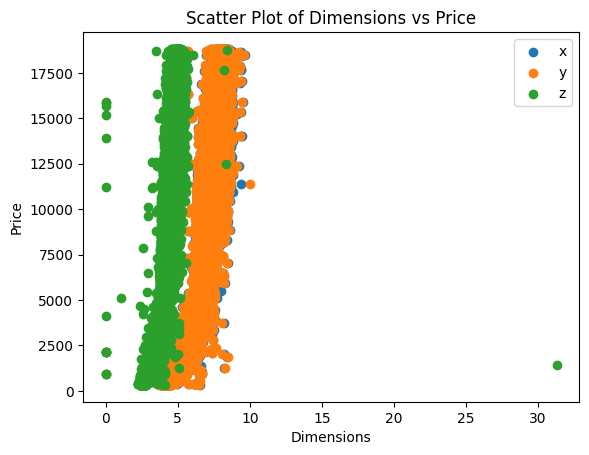

In [16]:
plt.scatter(df['carat'], df['price'])
plt.title('Scatter Plot of Carat vs Price')
plt.xlabel('Carat')
plt.ylabel('Price')
plt.show()

# Scatter plot between dimensions (x, y, z) and price
plt.scatter(df['x'], df['price'], label='x')
plt.scatter(df['y'], df['price'], label='y')
plt.scatter(df['z'], df['price'], label='z')
plt.title('Scatter Plot of Dimensions vs Price')
plt.xlabel('Dimensions')
plt.ylabel('Price')
plt.legend()
plt.show()

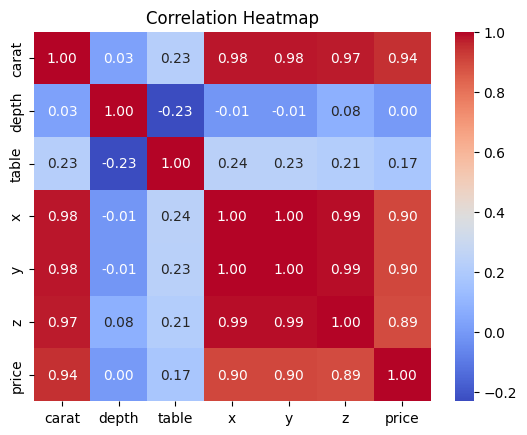

In [17]:
# Calculate correlation matrix
correlation_matrix = df[numerical_vars].corr()

# Plot correlation heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

## Outlier

In [28]:
# Identify outliers using IQR method
Q1 = df['price'].quantile(0.25)
Q3 = df['price'].quantile(0.75)
IQR = Q3 - Q1

# Define upper and lower bounds to identify outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
outliers = df [(df['price'] < lower_bound) | (df['price'] > upper_bound)]

# Handle outliers by removing or Winsorizing them
# For demonstration, let's remove outliers
gemstone_data_clean = df[(df['price'] >= lower_bound) & (df['price'] <= upper_bound)]




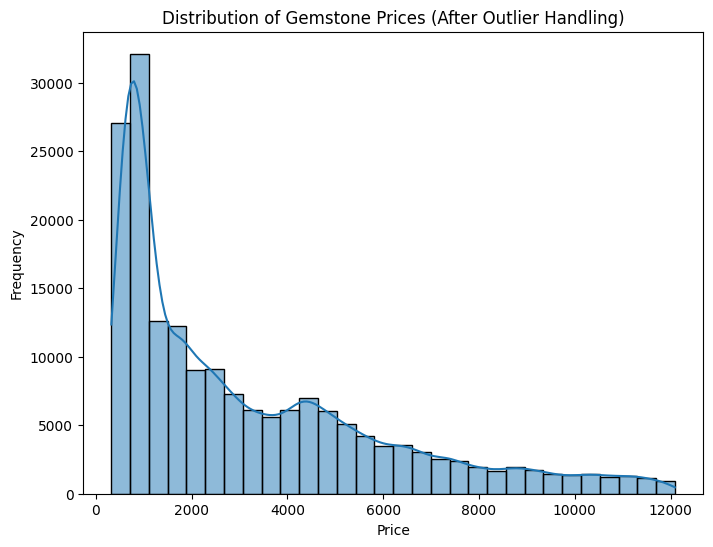

In [29]:
# Visualize the distribution of gemstone prices after handling outliers
plt.figure(figsize=(8, 6))
sns.histplot(gemstone_data_clean['price'], bins=30, kde=True)
plt.title('Distribution of Gemstone Prices (After Outlier Handling)')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

## Multi Variate analysis

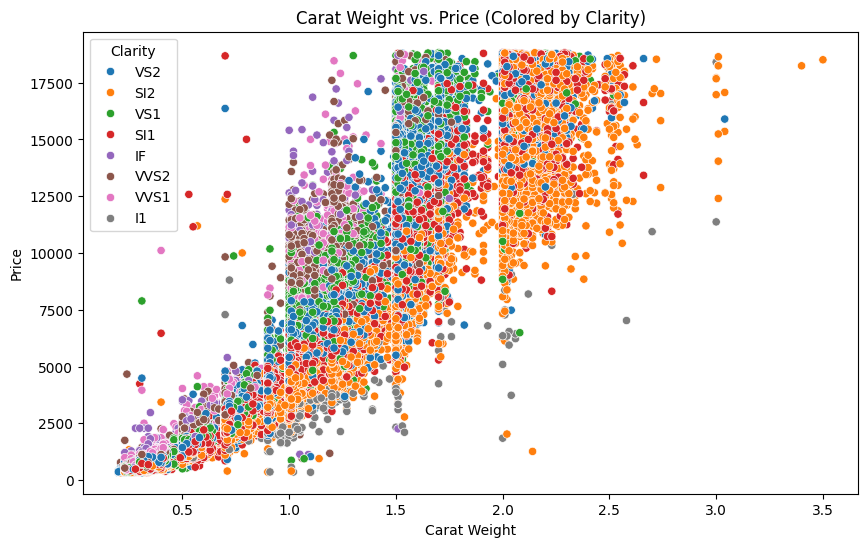

In [20]:
# Multivariate Analysis
# Relationship between carat weight, clarity, and price
plt.figure(figsize=(10, 6))
sns.scatterplot(x='carat', y='price', hue='clarity', data=df)
plt.title('Carat Weight vs. Price (Colored by Clarity)')
plt.xlabel('Carat Weight')
plt.ylabel('Price')
plt.legend(title='Clarity')
plt.show()

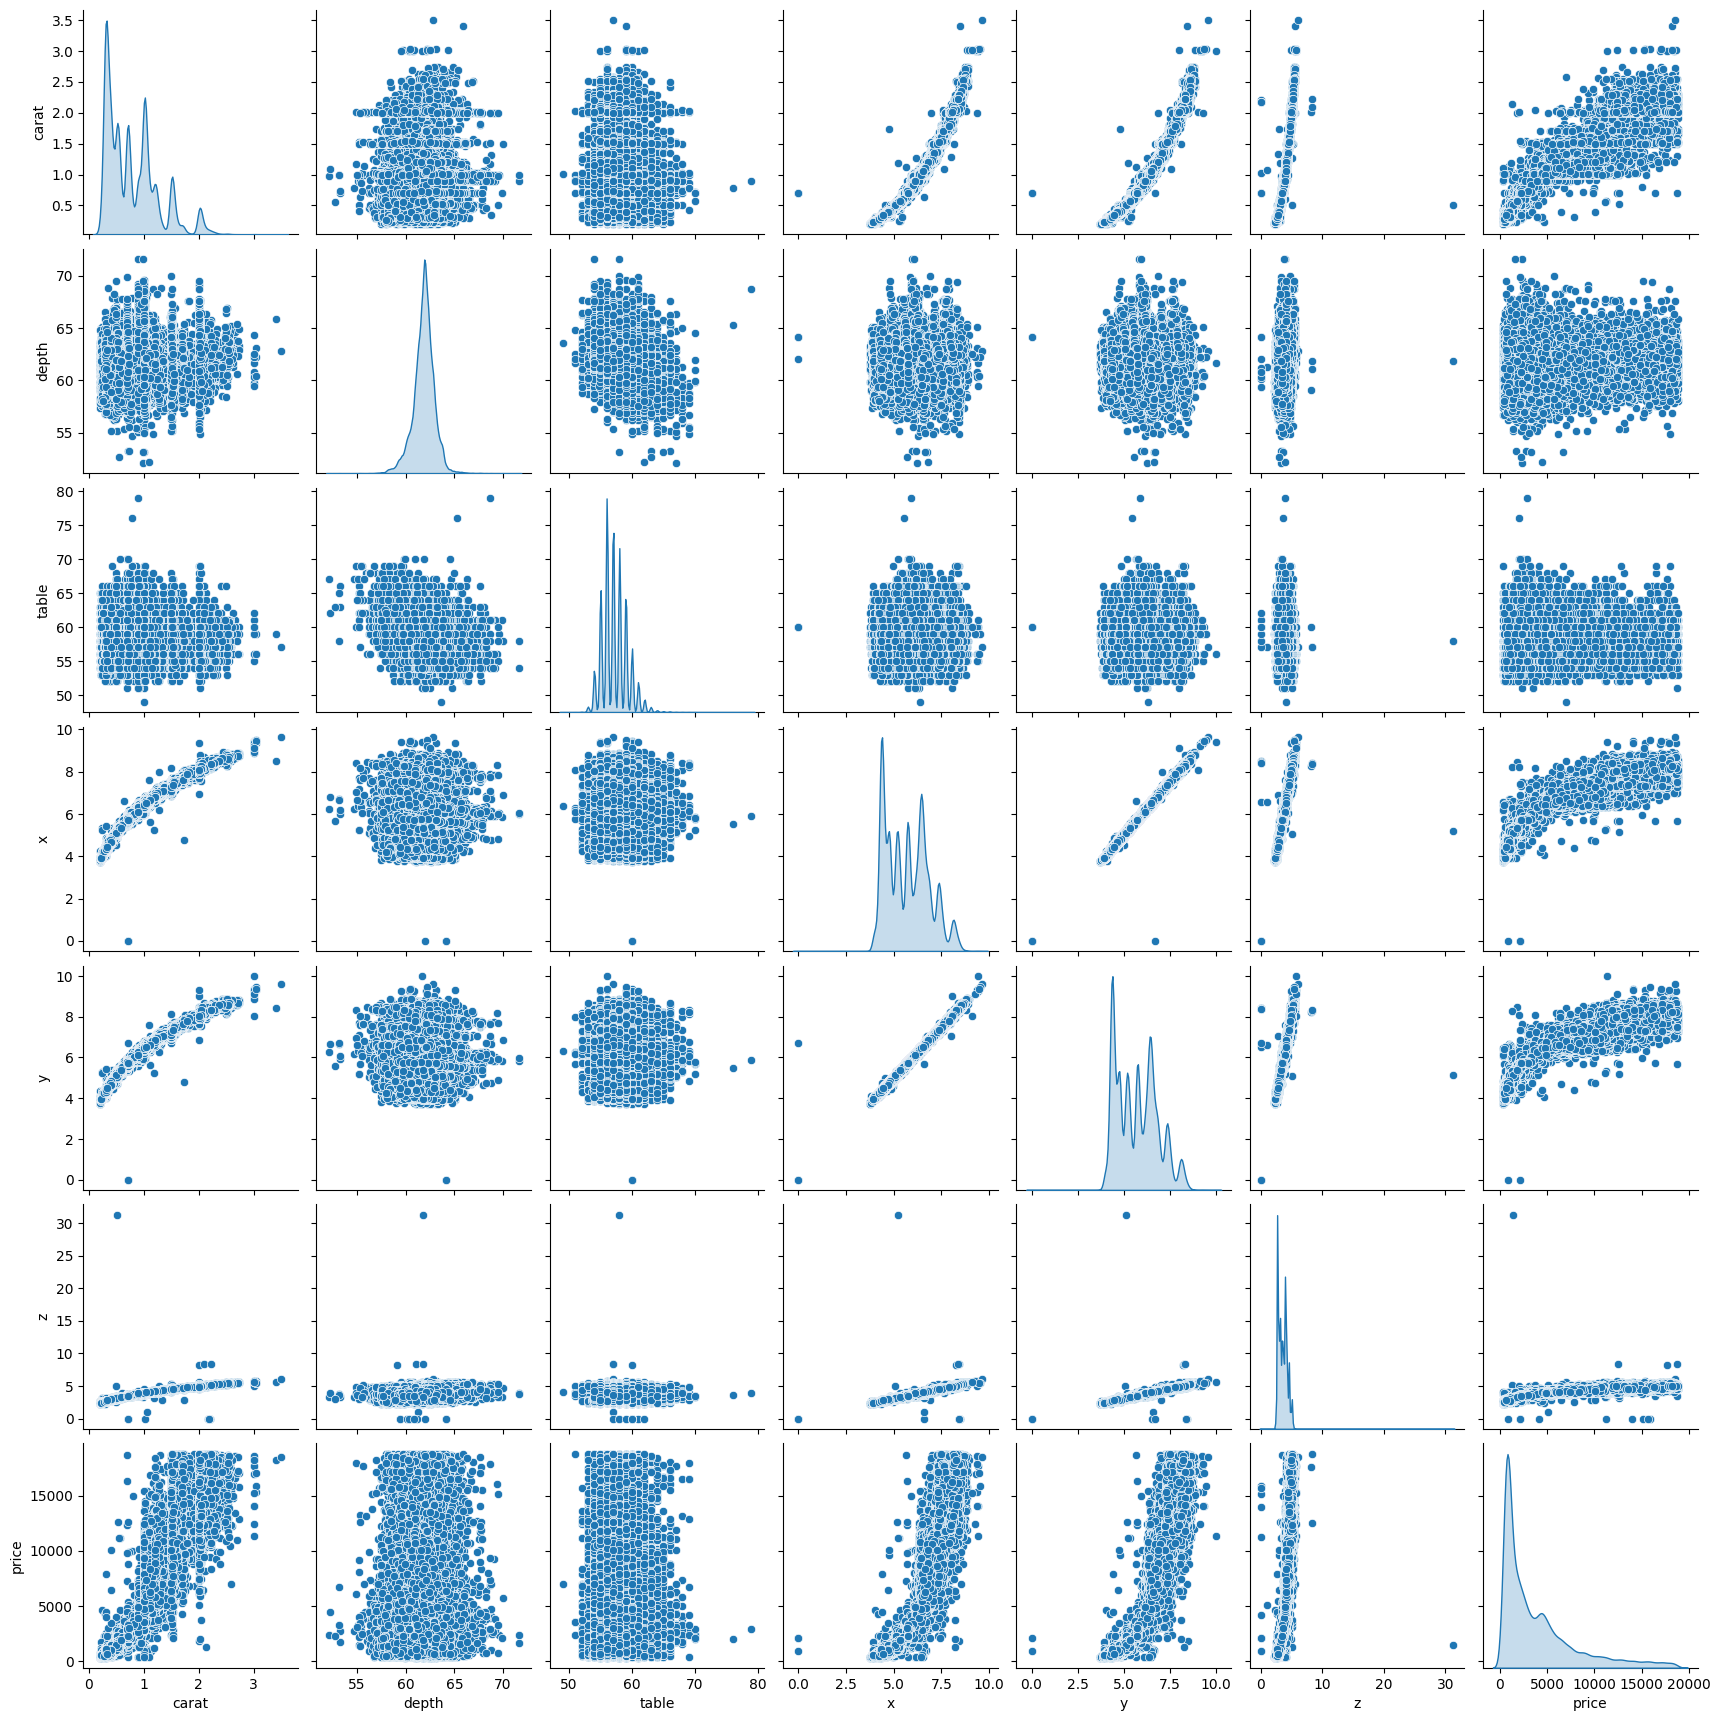

In [24]:
sns.pairplot(df,diag_kind='kde')
plt.show()

Categorical Features vs Target Feature Price Boxplot

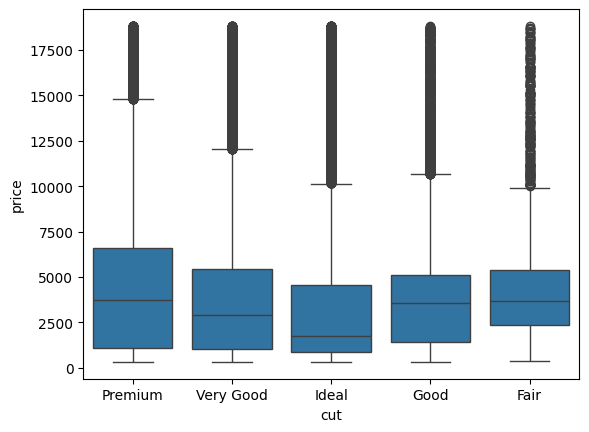

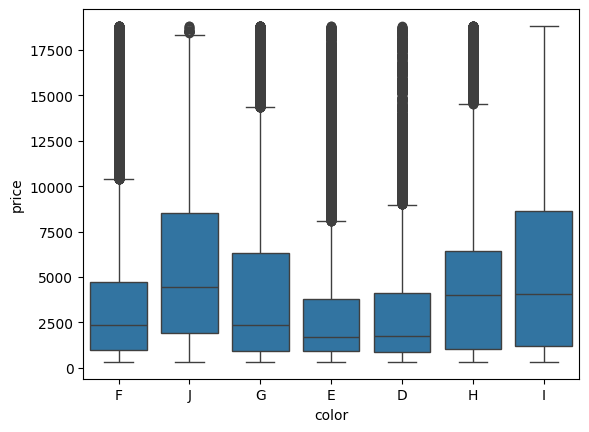

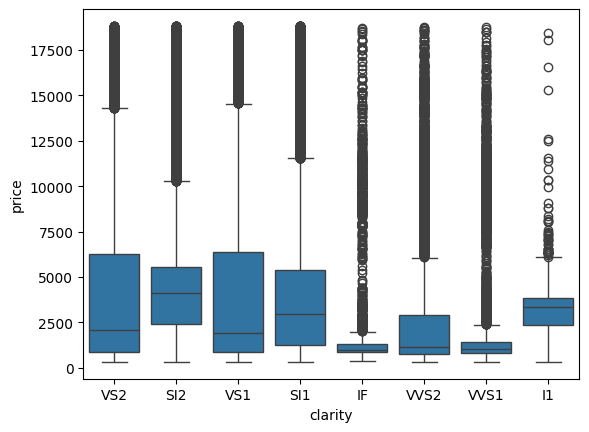

In [26]:
for i in categorical_columns:
    sns.boxplot(data=df, x=i , y='price')
    plt.show()

## Conclusion:-
* Carat weight emerges as the most influential factor in gemstone pricing, showing a strong positive correlation with price. 
* In our analysis, certain colors may show more pronounced effects on price, while others exhibit less consistent relationships.
* Outliers in gemstone prices may reflect unique characteristics or exceptional market conditions